In [63]:
import pandas as pd 
import numpy as np

df=pd.read_csv('Merged.csv')

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum(), 'no null values')




      Name        Date    High     Low    Open   Close  Volume     Marketcap  \
0  Bitcoin  28-04-2013  135.98  132.10  135.30  134.21     0.0  1.488567e+09   
1  Bitcoin  29-04-2013  147.49  134.00  134.44  144.54     0.0  1.603769e+09   
2  Bitcoin  30-04-2013  146.93  134.05  144.00  139.00     0.0  1.542813e+09   
3  Bitcoin  01-05-2013  139.89  107.72  139.00  116.99     0.0  1.298955e+09   
4  Bitcoin  02-05-2013  125.60   92.28  116.38  105.21     0.0  1.168517e+09   

   Year  Average  
0  2013  134.040  
1  2013  140.745  
2  2013  140.490  
3  2013  123.805  
4  2013  108.940  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052325 entries, 0 to 1052324
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Name       1052325 non-null  object 
 1   Date       1052325 non-null  object 
 2   High       1052325 non-null  float64
 3   Low        1052325 non-null  float64
 4   Open       1052325 non-null  float6

C:\Users\SHEEYASH\AppData\Local\Temp\ipykernel_16336\3184438400.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime


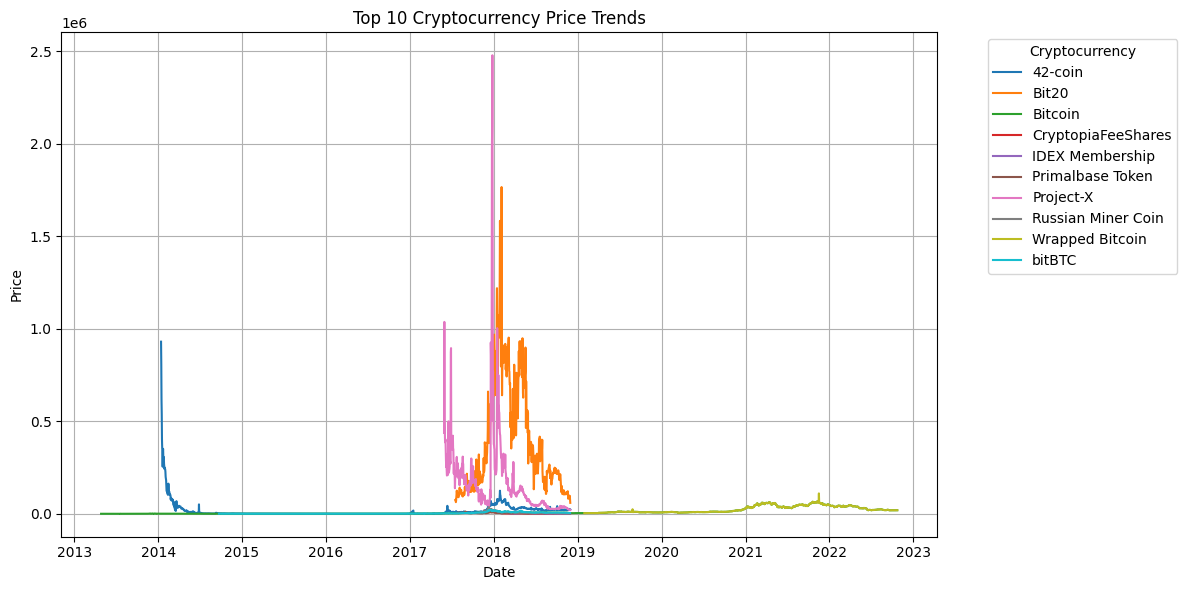

In [64]:
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df = df.sort_values('Date')  # Sort by date

top_cryptos = df.groupby('Name')['Average'].mean().sort_values(ascending=False).head(10).index  # Get top 5 cryptocurrencies by average price

top_cryptos = df.query('Name in @top_cryptos')

crypto_groups = top_cryptos.groupby('Name')

plt.figure(figsize=(12, 6))
for name, group in crypto_groups:
    plt.plot(group['Date'], group['Average'], label=name)

plt.title('Top 10 Cryptocurrency Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Cryptocurrency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()  # Adjust layout to fit legend
plt.show()

C:\Users\SHEEYASH\AppData\Local\Temp\ipykernel_16336\2275817977.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\SHEEYASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


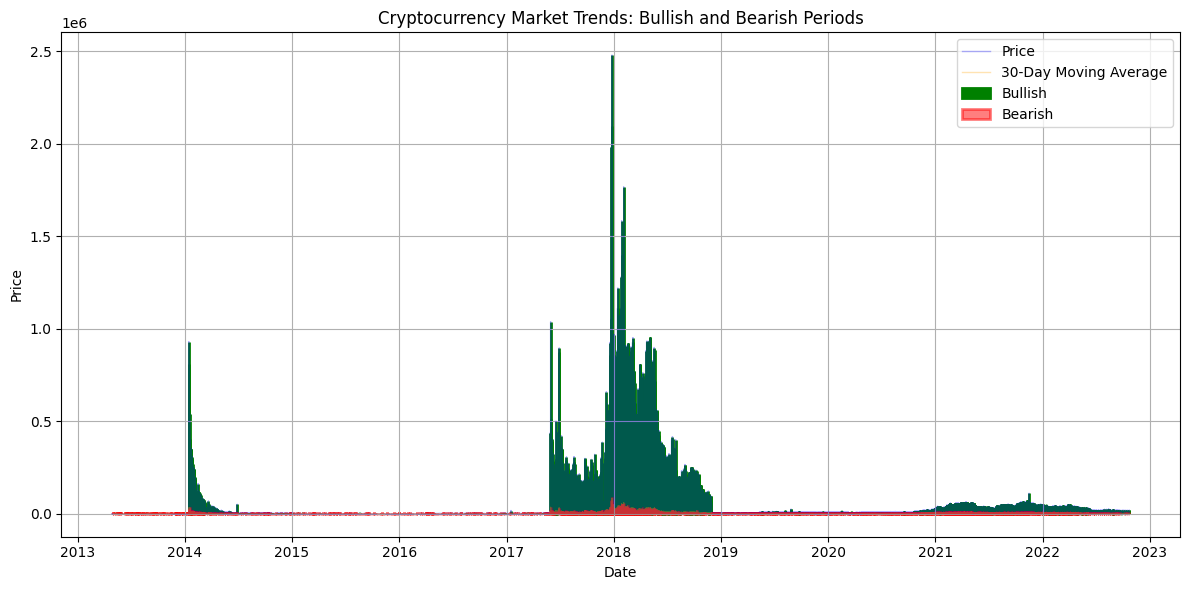

In [65]:

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')

df['Moving_Avg'] = df['Average'].rolling(window=30).mean()

# Identify bullish and bearish periods
df['Trend'] = 'Neutral'  # Default trend
df.loc[df['Average'] > df['Moving_Avg'], 'Trend'] = 'Bullish'
df.loc[df['Average'] < df['Moving_Avg'], 'Trend'] = 'Bearish'

# Plot the price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Average'], label='Price', color='blue', alpha=0.3,linewidth=1)
plt.plot(df.index, df['Moving_Avg'], label='30-Day Moving Average', color='orange',alpha=0.3, linewidth=1)

# Highlight bullish and bearish periods
plt.fill_between(df.index, df['Average'], df['Moving_Avg'], 
                 where=(df['Trend'] == 'Bullish'), color='green', alpha=1, label='Bullish',linewidth=2)
plt.fill_between(df.index, df['Average'], df['Moving_Avg'], 
                 where=(df['Trend'] == 'Bearish'), color='red', alpha=0.5, label='Bearish',linewidth=2)

# Add plot details
plt.title('Cryptocurrency Market Trends: Bullish and Bearish Periods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

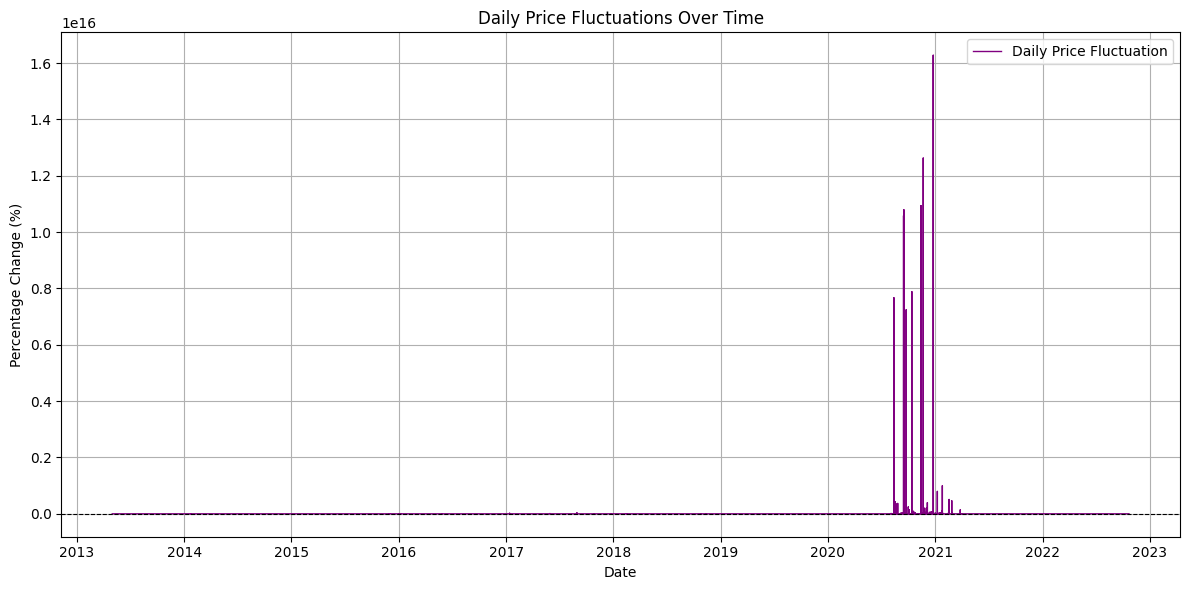

In [66]:

df['Price_Change'] = df['Average'].pct_change() * 100  # Percentage change

# Drop NaN values created by the pct_change() function
df = df.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price_Change'], label='Daily Price Fluctuation', color='purple', linewidth=1)

# Add plot details
plt.title('Daily Price Fluctuations Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Add a horizontal line at 0
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

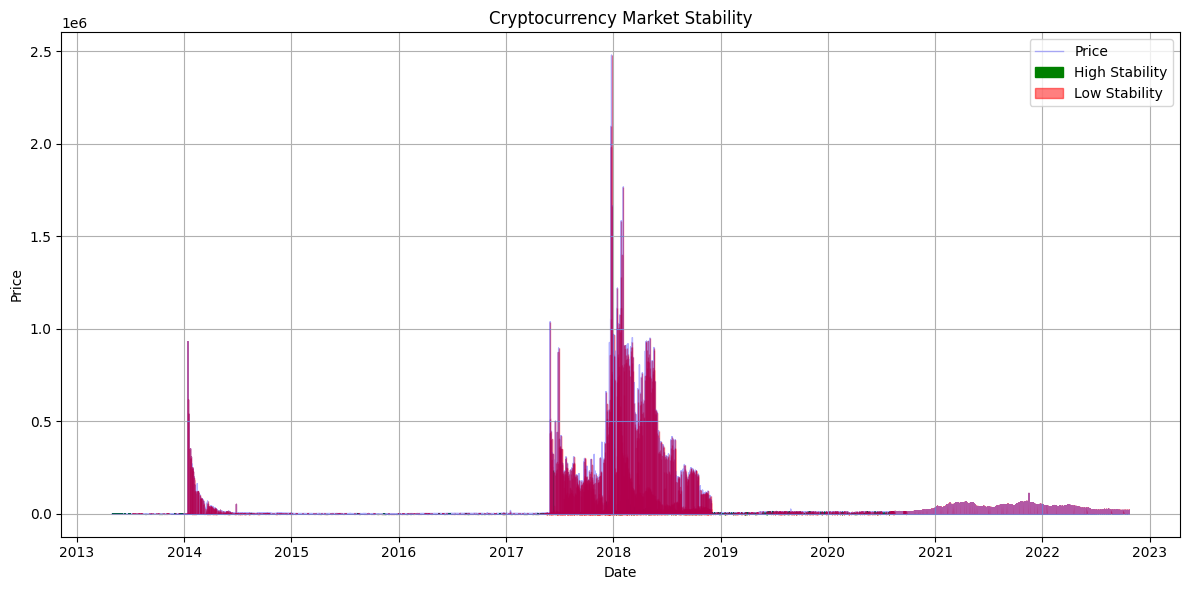

In [67]:


df['Volatility'] = df['Price_Change'].rolling(window=30).std()

# Define thresholds for high and low stability
high_volatility_threshold = df['Volatility'].quantile(0.75)  # Top 25% volatility
low_volatility_threshold = df['Volatility'].quantile(0.25)  # Bottom 25% volatility

# Classify periods of high and low stability
df['Stability'] = 'Medium Stability'  # Default classification
df.loc[df['Volatility'] > high_volatility_threshold, 'Stability'] = 'Low Stability'
df.loc[df['Volatility'] < low_volatility_threshold, 'Stability'] = 'High Stability'

# Plot the price with stability periods highlighted
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Average'], label='Price', color='blue',alpha=0.3, linewidth=1)

# Highlight high and low stability periods
plt.fill_between(df.index, df['Average'], 
                 where=(df['Stability'] == 'High Stability'), color='green', alpha=1, label='High Stability')
plt.fill_between(df.index, df['Average'], 
                 where=(df['Stability'] == 'Low Stability'), color='red', alpha=0.5, label='Low Stability')

# Add plot details
plt.title('Cryptocurrency Market Stability')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()